<a href="https://colab.research.google.com/github/yananma/5_programs_per_day/blob/master/02134.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 7.6 RMSProp 算法

### 7.6.1 算法

epoch 20, x1 -0.010599, x2 0.000000


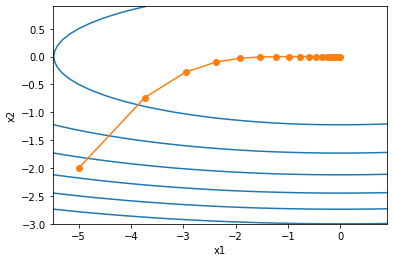

In [1]:
%matplotlib inline 
import math 
import torch 
import d2l 


def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6 
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2 
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2 
    x1 -= eta / math.sqrt(s1 + eps) * g1 
    x2 -= eta / math.sqrt(s2 + eps) * g2 
    return x1, x2, s1, s2 

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2 

eta, gamma = 0.4, 0.9 
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

### 7.6.2 从零开始实现

In [0]:
!mkdir ../../data 

In [3]:
!git clone https://github.com/ShusenTang/Dive-into-DL-PyTorch.git

Cloning into 'Dive-into-DL-PyTorch'...
remote: Enumerating objects: 1692, done.
remote: Total 1692 (delta 0), reused 0 (delta 0), pack-reused 1692
Receiving objects: 100% (1692/1692), 25.29 MiB | 50.37 MiB/s, done.
Resolving deltas: 100% (975/975), done.


In [0]:
!cp Dive-into-DL-PyTorch/data/airfoil_self_noise.dat ../../data

In [0]:
features, labels = d2l.get_data_ch7()

def init_rmsprop_states():
    s_w = torch.zeros((features.shape[1], 1), dtype=torch.float32)
    s_b = torch.zeros(1, dtype=torch.float32)
    return (s_w, s_b)

def rmsprop(params, states, hyperparams):
    gamma, eps = hyperparams['gamma'], 1e-6 
    for p , s in zip(params, states):
        s.data = gamma * s.data + (1 - gamma) * (p.grad.data) ** 2 
        p.data -= hyperparams['lr'] * p.grad.data / torch.sqrt(s + eps)

loss: 0.242802, 0.058468 sec per epoch


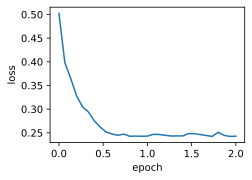

In [8]:
d2l.train_ch7(rmsprop, init_rmsprop_states(), {'lr': 0.01, 'gamma': 0.9}, features, labels)

### 7.6.3 简洁实现

loss: 0.246372, 0.070145 sec per epoch


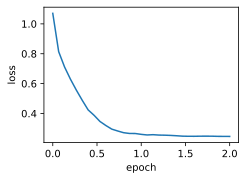

In [10]:
d2l.train_pytorch_ch7(torch.optim.RMSprop, {'lr': 0.01, 'alpha': 0.9}, features, labels)